In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:

# Load the data
df=pd.read_csv(r'C:\Users\Downloads\loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(39717, 111)

In [5]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
# Check column wise and remove the Null values.
df.dropna(axis = 1, how = 'all', inplace = True)

In [7]:
df.shape

(39717, 57)

In [13]:
#After going through Data Dictionarys 
# 1. Colums {"id", "member_id, "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state"} holding data which 
#    are for individual not useful for overall loan defaulting terms, so droping those.

In [8]:
df.drop(["desc","id", "member_id", "title", "emp_title", "url","zip_code", "addr_state"], axis = 1, inplace = True)

In [9]:
df.shape

(39717, 49)

In [10]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [27]:
# Columns with single value can not use for analysis, So droping them 

In [11]:
df.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','next_pymnt_d','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'chargeoff_within_12_mths'],
      dtype='object')

In [12]:
df.shape

(39717, 39)

In [13]:
# Investers related colums are not required, Because we focused on loan deafulters.
df.drop(['total_pymnt_inv','out_prncp_inv', 'funded_amnt_inv'], axis = 1, inplace = True)

In [65]:
# Checking any null values still available 
print((df.isnull().sum()/len(df))*100)

loan_amnt                   0.000000
funded_amnt                 0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
revol_util                  0.125891
total_acc                   0.000000
out_prncp                   0.000000
total_pymnt                 0.000000
total_rec_prncp             0.000000
total_rec_int               0.000000
t

In [14]:
# Droping mths_since_last_delinq,next_pymnt_d & mths_since_last_record  becuse, Maximum data is missing
df.drop(['mths_since_last_delinq','mths_since_last_record'], axis = 1, inplace = True)


In [67]:
print((df.isnull().sum()/len(df))*100)

loan_amnt                   0.000000
funded_amnt                 0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
revol_util                  0.125891
total_acc                   0.000000
out_prncp                   0.000000
total_pymnt                 0.000000
total_rec_prncp             0.000000
total_rec_int               0.000000
t

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 39717 non-null  int64  
 1   funded_amnt               39717 non-null  int64  
 2   term                      39717 non-null  object 
 3   int_rate                  39717 non-null  object 
 4   installment               39717 non-null  float64
 5   grade                     39717 non-null  object 
 6   sub_grade                 39717 non-null  object 
 7   emp_length                38642 non-null  object 
 8   home_ownership            39717 non-null  object 
 9   annual_inc                39717 non-null  float64
 10  verification_status       39717 non-null  object 
 11  issue_d                   39717 non-null  object 
 12  loan_status               39717 non-null  object 
 13  purpose                   39717 non-null  object 
 14  dti   

In [16]:
#The last_credit_pull_d and revol_util' has very low null values so removing the rows for which values are null.
df.dropna(axis = 0, subset = ['last_credit_pull_d','revol_util'] , inplace = True)


In [70]:
print((df.isnull().sum()/len(df))*100)

loan_amnt                   0.000000
funded_amnt                 0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_length                  2.702635
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
revol_util                  0.000000
total_acc                   0.000000
out_prncp                   0.000000
total_pymnt                 0.000000
total_rec_prncp             0.000000
total_rec_int               0.000000
t

In [17]:
# For emp_lengh missing values are with low percentage, So using mode value doesnt affect the analysis much comapred to mean and median
df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)
df.emp_length.isna().sum()

0

In [18]:
print((df.isnull().sum()/len(df))*100)

loan_amnt                   0.000000
funded_amnt                 0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_length                  0.000000
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
revol_util                  0.000000
total_acc                   0.000000
out_prncp                   0.000000
total_pymnt                 0.000000
total_rec_prncp             0.000000
total_rec_int               0.000000
t

In [74]:
# chargeoff_within_12_mths & next_pymnt_d are not required for defaulting the cause study. So removing those columns

In [19]:
df.drop(['last_pymnt_d','chargeoff_within_12_mths'], axis = 1, inplace = True)

In [76]:
print((df.isnull().sum()/len(df))*100)

loan_amnt                  0.0
funded_amnt                0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
total_pymnt                0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveries                 0.0
collection_recovery_fee    0.0
last_pymnt_amnt            0.0
last_credit_pull_d         0.0
dtype: f

In [20]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,9,0.00,5863.155187,5000.00,863.16,0.00,0.00,0.00,171.62,May-16
1,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,4,0.00,1008.710000,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13
2,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,10,0.00,3005.666844,2400.00,605.67,0.00,0.00,0.00,649.91,May-16
3,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,37,0.00,12231.890000,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16
4,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,38,524.06,3513.330000,2475.94,1037.39,0.00,0.00,0.00,67.79,May-16


In [21]:
# Seting int_rate % to standerd 
# setting emp_lengh years lessthan 1 as 0, 10+years as 10,1 year as 1
df.int_rate = pd.to_numeric(df.int_rate.apply(lambda x : x.split('%')[0]))
df.emp_length = pd.to_numeric(df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [80]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,9,0.00,5863.155187,5000.00,863.16,0.00,0.00,0.00,171.62,May-16
1,2500,2500,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,4,0.00,1008.710000,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13
2,2400,2400,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,10,0.00,3005.666844,2400.00,605.67,0.00,0.00,0.00,649.91,May-16
3,10000,10000,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,37,0.00,12231.890000,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16
4,3000,3000,60 months,12.69,67.79,B,B5,1,RENT,80000.0,...,38,524.06,3513.330000,2475.94,1037.39,0.00,0.00,0.00,67.79,May-16


In [22]:
loan_status = df["loan_status"]
print(loan_status)

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39665, dtype: object


In [23]:
# as we focusing on default the current statts loans need to be ignored
df = df[df.loan_status != "Current"]

In [57]:
df['term_months'] = df['term'].str.rstrip('months')
del df['term']

In [59]:
columns = ['total_acc', 'term_months']
df[columns] = df[columns].astype(np.int)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [60]:
df.head()

,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,int_rate_groups,open_acc_groups,annual_inc_groups,annual_inc_lakhs,annual_inc_grp,term_months
0,5000,5000,10.65,162.87,B,B2,10,RENT,24000.0,Verified,...,0.00,0.00,171.62,May-16,9%-13%,2-10,3k-31k,24.000,3k-30k,36
1,2500,2500,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,...,117.08,1.11,119.66,Sep-13,13%-17%,2-10,3k-31k,30.000,3k-30k,60
2,2400,2400,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,...,0.00,0.00,649.91,May-16,13%-17%,2-10,3k-31k,12.252,3k-30k,36
3,10000,10000,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,...,0.00,0.00,357.48,Apr-16,13%-17%,2-10,3k-31k,49.200,3k-30k,36
5,5000,5000,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,...,0.00,0.00,161.03,Jan-16,5%-9%,2-10,3k-31k,36.000,3k-30k,36


In [68]:
# UNIVARIANT ANALYSIS
#  Checking Loan Status
#  Check the grade of loans
#  check emp_Exp to the loan tenure
# Check Home ownership to the loan
# Check Loan Purpose
# creating bins for open_acc
# bins for int_rate, annual_inc
# Check Int_rate to find defaulters
# cHecking Anual_inc to find defaulters

In [37]:
df['annual_inc_lakhs'] = df['annual_inc'] / 1000
df['annual_inc_lakhs'].describe()


count    38522.000000
mean        68.806265
std         64.217249
min          4.000000
25%         40.000000
50%         59.000000
75%         82.000000
max       6000.000000
Name: annual_inc_lakhs, dtype: float64

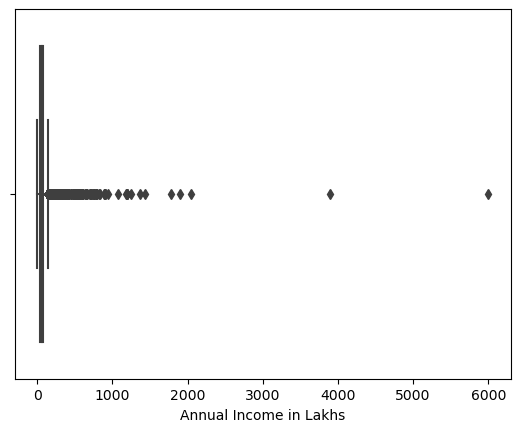

In [38]:
sns.boxplot(x=df['annual_inc_lakhs'])
plt.xlabel('Annual Income in Lakhs')
plt.show()
# Thier are two applivants whos annual income is more than 3 lakh

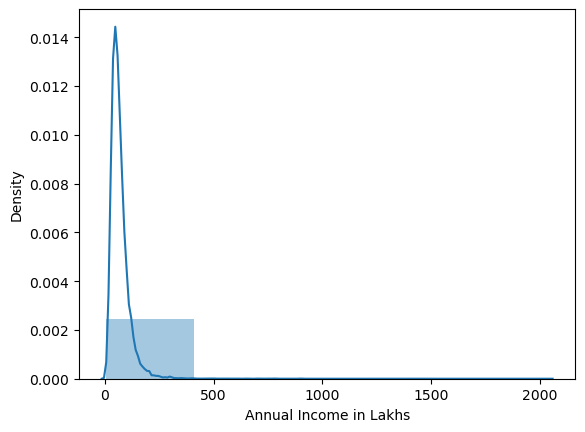

In [44]:
sns.distplot(df[df['annual_inc_lakhs'] < 3000]['annual_inc_lakhs'], bins=5)
plt.xlabel('Annual Income in Lakhs')
plt.show()
# Applicants whos income is less than 5lakh taken the Loan

In [24]:
df["loan_amnt"].value_counts()

loan_amnt
10000    2808
12000    2247
5000     2021
6000     1886
15000    1837
         ... 
9075        1
17175       1
21700       1
16550       1
22550       1
Name: count, Length: 869, dtype: int64

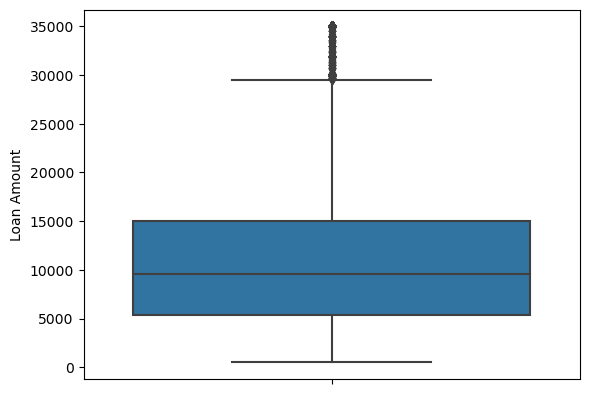

In [86]:
#PLOT
sns.boxplot( y=df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

In [87]:
# observation - mean is 10000 for loan amounts from 0 to 35000

In [25]:
#
df["loan_status"].value_counts()

loan_status
Fully Paid     32915
Charged Off     5610
Name: count, dtype: int64

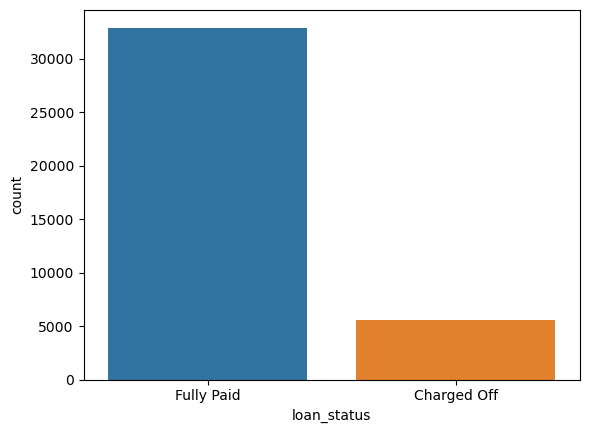

In [91]:
sns.countplot(x= df["loan_status"])
plt.show()

In [92]:
# Observation - Megarity are fully paid

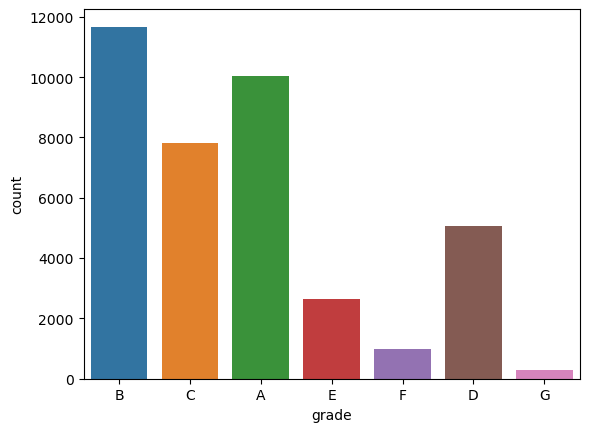

In [26]:
sns.countplot(x='grade', data=df)
plt.show()

In [94]:
# Observation - High count of loans are high graded. Megarity we can see for A and B

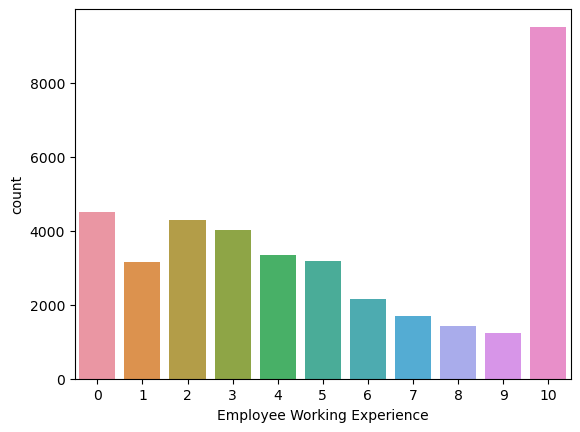

In [27]:
sns.countplot(x='emp_length', data= df)
plt.xlabel('Employee Working Experience')
plt.show()


In [101]:
# Observation - employes whos exp is 10 years having more loans

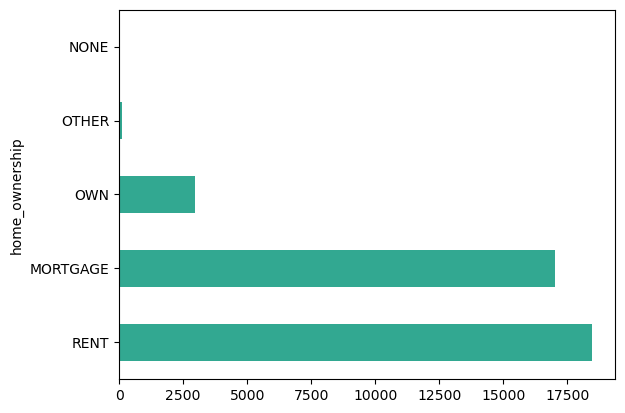

In [28]:
df.home_ownership.value_counts().plot.barh(color="#32a891")
plt.show()

In [29]:
df['home_ownership'].value_counts()

home_ownership
RENT        18447
MORTGAGE    17009
OWN          2970
OTHER          96
NONE            3
Name: count, dtype: int64

In [30]:
# removing none values
df= df[df.home_ownership != "NONE"]

<Axes: xlabel='home_ownership', ylabel='count'>

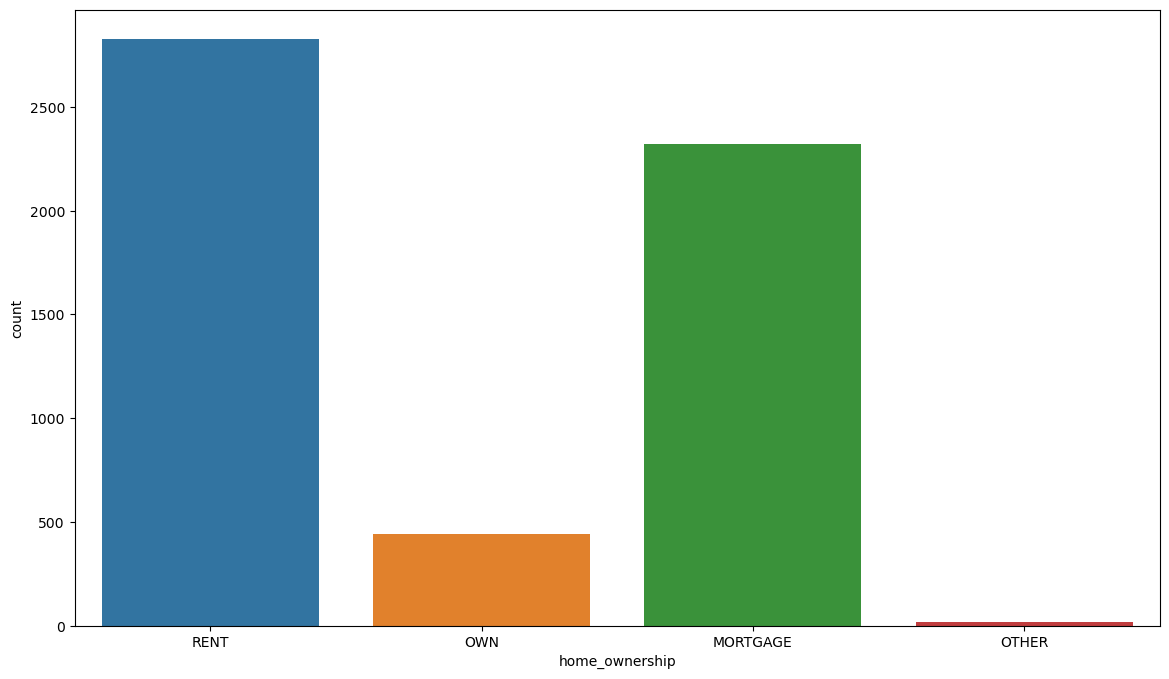

In [118]:
Count = df[df['loan_status']=='Charged Off']
f, a = plt.subplots(figsize = (14,8))
sns.countplot(x='home_ownership', data=Count)

<Axes: xlabel='purpose', ylabel='count'>

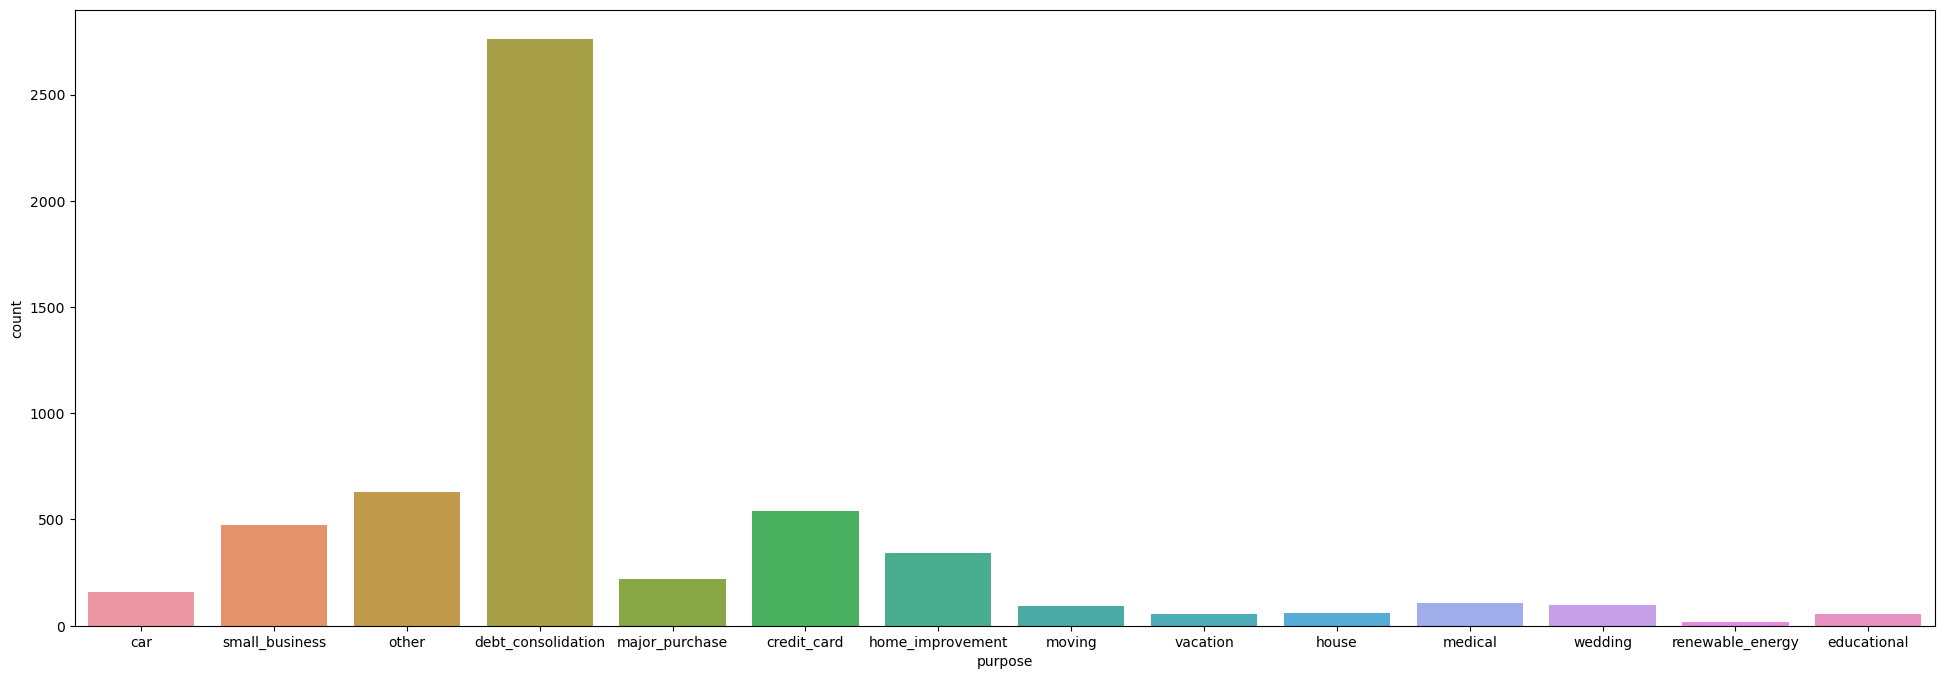

In [31]:

Count = df[df['loan_status']=='Charged Off']
f, a = plt.subplots(figsize = (24,8))
sns.countplot(x= 'purpose', data = Count)

In [32]:
#creating bins for int_rate,open_acc,revol_util,total_acc
df['int_rate_groups'] = pd.cut(df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
df['open_acc_groups'] = pd.cut(df['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
df['annual_inc_groups'] = pd.cut(df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [33]:
# Viewing new bins created
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,int_rate_groups,open_acc_groups,annual_inc_groups
0,5000,5000,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,5000.00,863.16,0.00,0.00,0.00,171.62,May-16,9%-13%,2-10,3k-31k
1,2500,2500,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,13%-17%,2-10,3k-31k
2,2400,2400,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,2400.00,605.67,0.00,0.00,0.00,649.91,May-16,13%-17%,2-10,3k-31k
3,10000,10000,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16,13%-17%,2-10,3k-31k
5,5000,5000,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,5000.00,632.21,0.00,0.00,0.00,161.03,Jan-16,5%-9%,2-10,3k-31k


<Axes: xlabel='open_acc_groups', ylabel='count'>

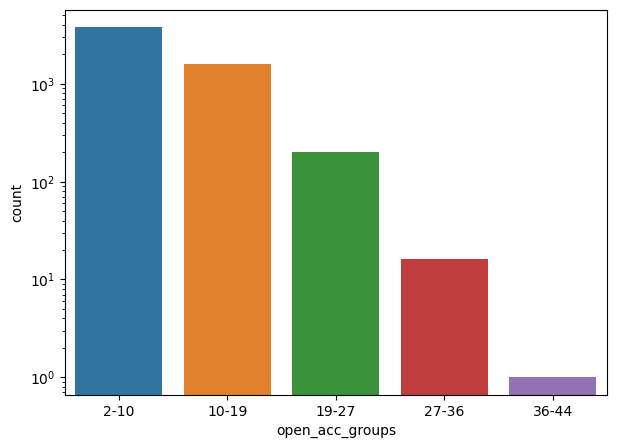

In [34]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=df[df.loan_status == 'Charged Off'])

<Axes: xlabel='int_rate_grp', ylabel='count'>

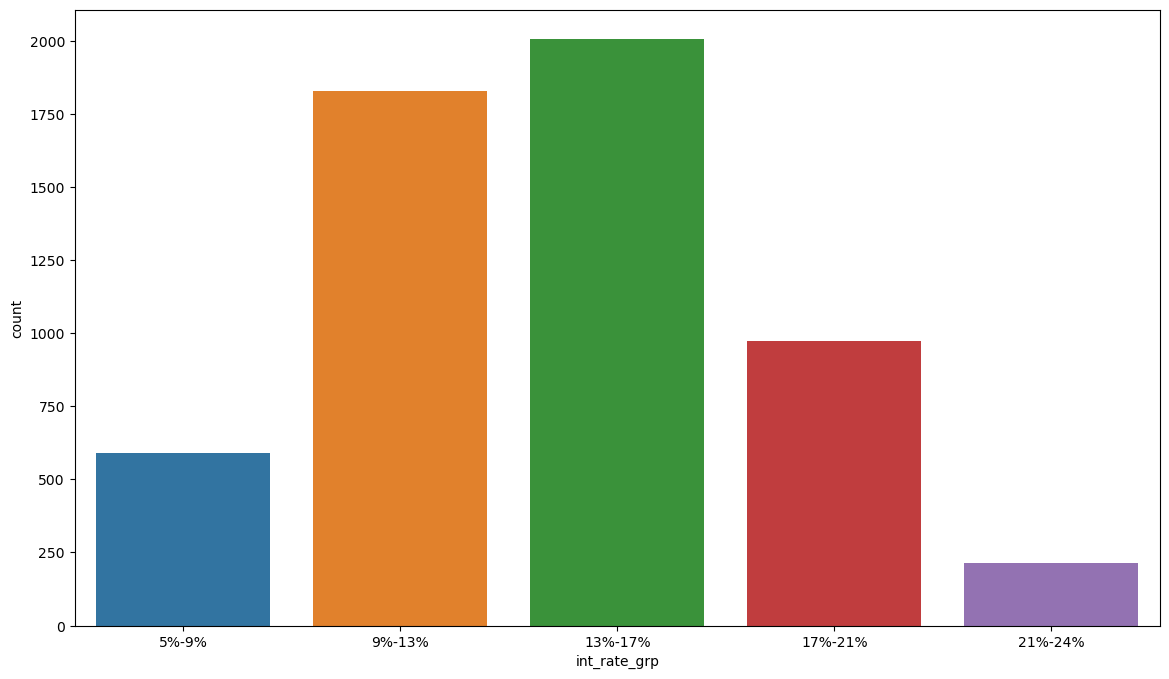

In [149]:
f, a = plt.subplots(figsize = (14,8))
sns.countplot(x='int_rate_grp', data=Count)
# People with loans at 13-17 % default more

In [49]:


# bins for int_rate, annual_inc

df['annual_inc_grp'] = pd.cut(df['annual_inc'], 
                                 bins=5,precision =0,labels =['3k-30k','30k-60k','60k-90k','90k-110k','110k-140k'])

In [51]:
df['annual_inc_grp'].value_counts()

annual_inc_grp
3k-30k       38514
30k-60k          6
90k-110k         1
110k-140k        1
60k-90k          0
Name: count, dtype: int64

<Axes: xlabel='annual_inc_grp', ylabel='count'>

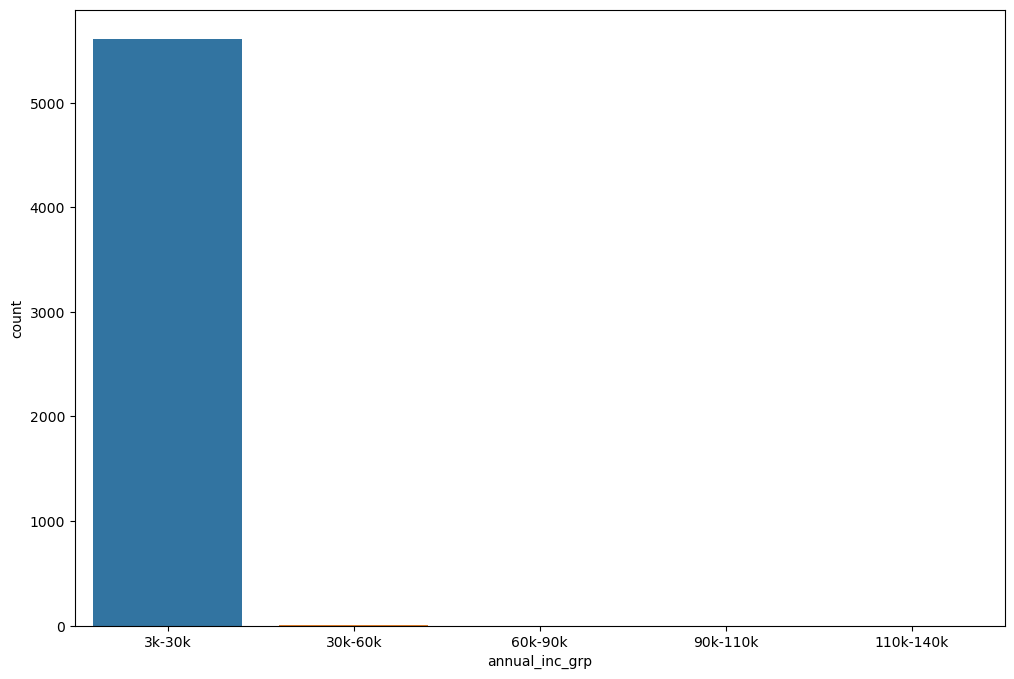

In [55]:
loans_chgd_off = df[df['loan_status']=='Charged Off']
f, a = plt.subplots(figsize = (12,8))
sns.countplot(x = "annual_inc_grp", data = loans_chgd_off)
# more defaulters falls in anual income under 30K

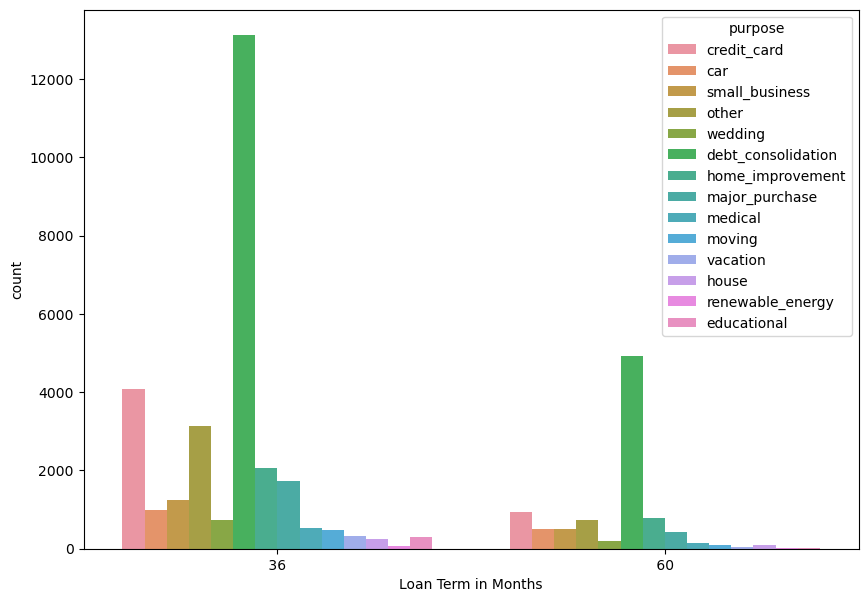

In [66]:
plt.figure(figsize=(10,7))
sns.countplot( x="term_months", hue='purpose', data=df)
plt.xlabel('Loan Term in Months')
plt.show()
#Loan term of 36 months having more chnace of defaulters

<Axes: xlabel='verification_status', ylabel='count'>

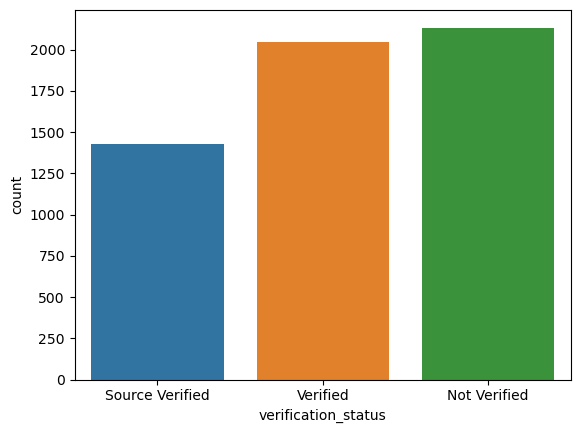

In [71]:
sns.countplot(x='verification_status', data=df[df['loan_status']=='Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

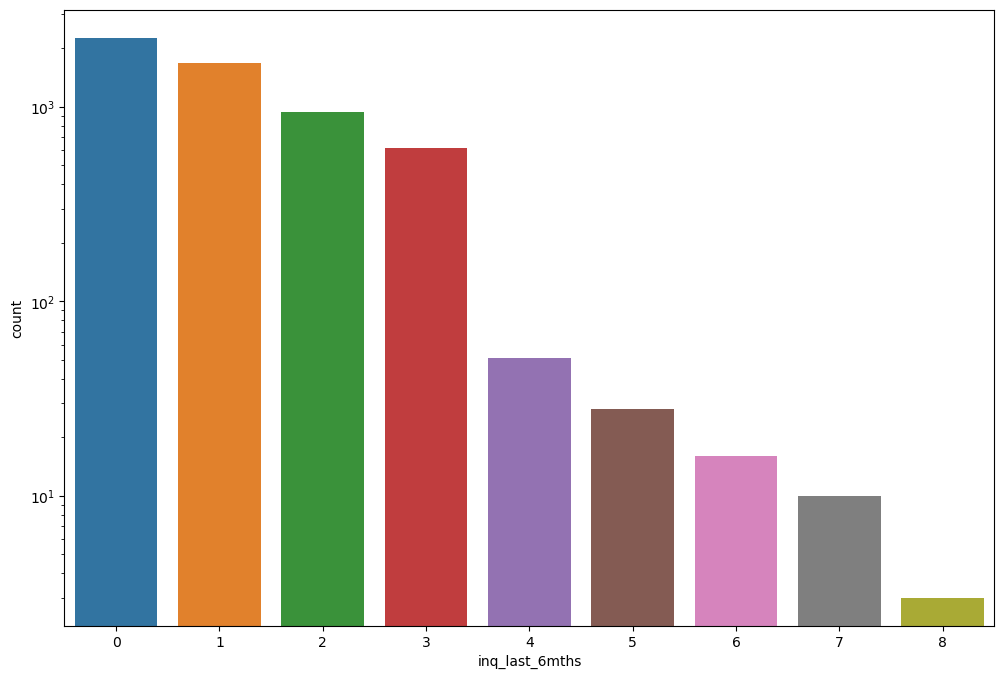

In [72]:
fig,ax = plt.subplots(figsize = (12,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=df[df['loan_status']=='Charged Off'])

In [76]:
## Extracting month and year
df_month_year = df['issue_d'].str.partition("-", True)     
df['issue_month']=df_month_year[0]                       
df['issue_year']='20' + df_month_year[2]

<Axes: xlabel='issue_month', ylabel='count'>

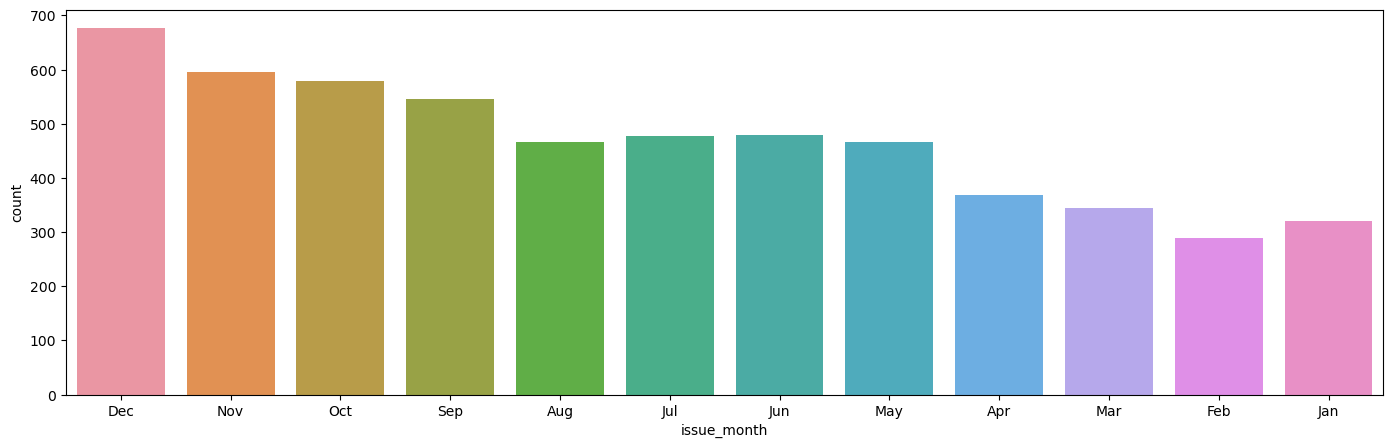

In [77]:

fig,ax = plt.subplots(figsize = (17,5))
sns.countplot(x='issue_month', data=df[df['loan_status']=='Charged Off'])

## observation - when loan is issued in DECEMBER max defaults occured

<Axes: xlabel='issue_year', ylabel='count'>

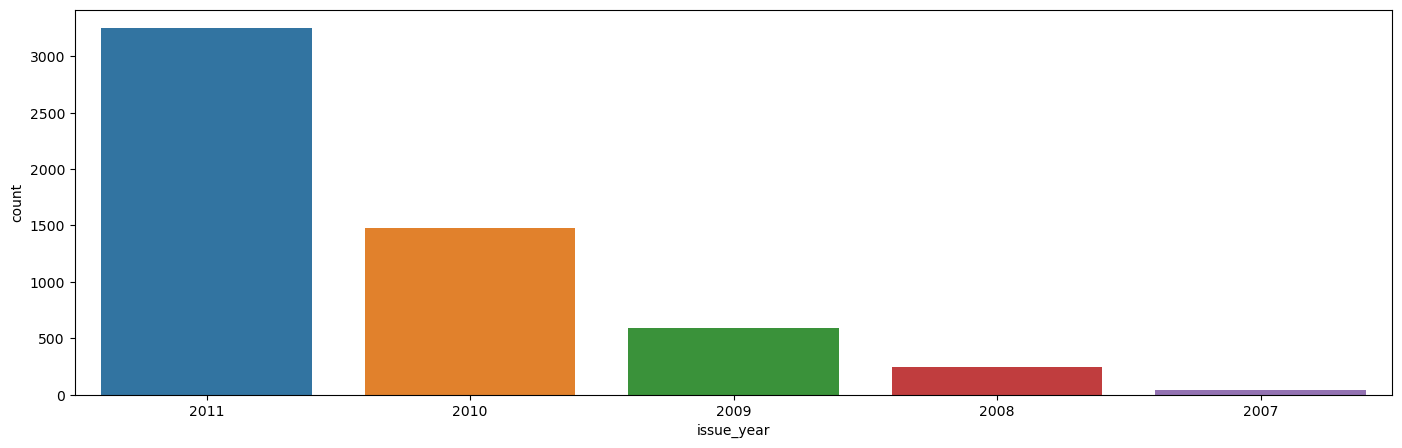

In [79]:
fig,ax = plt.subplots(figsize = (17,5))
sns.countplot(x='issue_year', data=df[df['loan_status']=='Charged Off'])

In [80]:
#Observation -Loan issued in 2011 has Max defaulters.